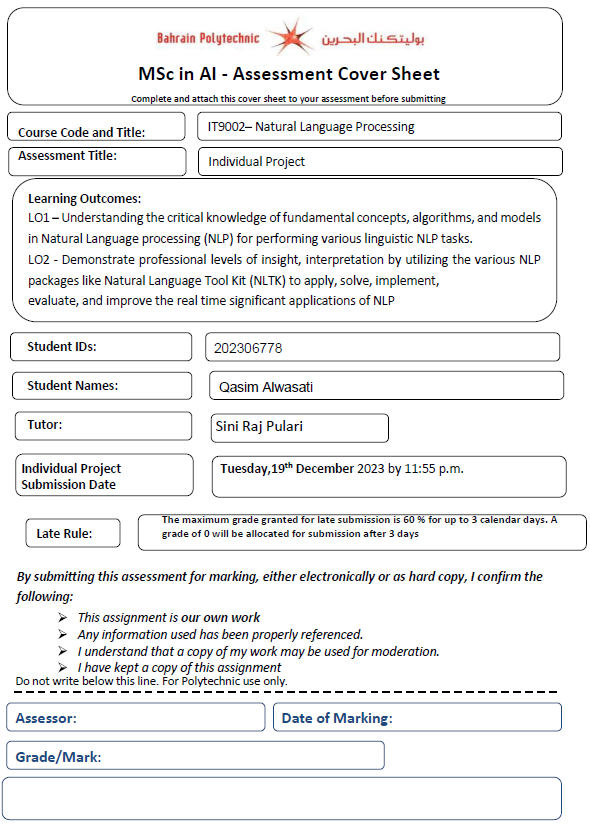

* **IT9002 - NLP Project** - Sentimental Analysis
* **"Sentiment Analysis" of IMDB Film Reviews**
* **Tutor:** Sini Raj Pulari
* **Student Name:** Qasim Alwasati - ID: 202306778

**Important Notes:**
- **Always refer to the actual ipynb file as some cells disappear when saving as a PDF - especially last section 7**
- The Due data for submission in the above cover page - downloaded from moodle - is not accurate. The due data is 13th-Dec-2023.
- To avoid errors, please make sure to run-all instead of running the individual cells separately*

**Problem Statement Formulation and definition:**

* In the current digital era, the vast amounts of user-generated content on social media platforms, blogs, forums, and review sites contain valuable insights into public sentiment on a wide range of topics. Businesses, policymakers, and researchers are increasingly interested in efficiently analyzing this sentiment to inform decision-making processes, improve customer experiences, and understand public opinion. However, doing this manually through this data is time-consuming and impractical. Therefore, there is a need for an automated sentiment analysis system that can accurately classify text data into sentiment categories (e.g., positive, negative, neutral).

* The objective of this project is to develop and compare different machine learning models, including Complement Naive Bayes (CNB), Recurrent Neural Networks (RNN), and Long Short-Term Memory networks (LSTM), to identify the most effective approach for sentiment classification.

* We will follow the normal NLP pipeline when performing this project. The below screenshot shows the pipeline for this project.

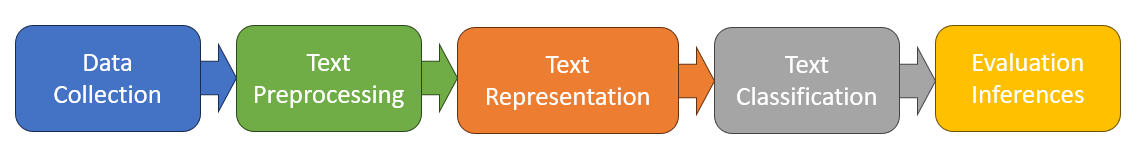



---



---



# Table of Content:
1. Importing the required libraries
2. Importing the Dataset
3. Dataset quick review and analysis
4. Text Preprocessing
5. Text Representation
6. Text Classification
7. Evaluation, Inferences, Rcommendation and Reflection



---



---



## 1. Importing the necessary libraries and thier dependencies

In [1]:
import numpy as np #For numberical operations
import pandas as pd #For importing the dataset as a dataframe and some data processing
import string #For string related operations
import re #For regex implementaion when required
from matplotlib import pyplot as plt #For visualizing data distributions

# Importing NLTK library and other required dependencies
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('punkt') #Used for tokenization
nltk.download('stopwords') #List of all English stopwords
nltk.download('wordnet') #For lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



---



## 2. Importing the dataset into Python (csv)
 * **Source of Dataset**: Kaggle, "IMDB Dataset of 50K Movie Reviews" - link below.
 * **Why this dataset has been choosen:**
  * Contains 50K reviews which is substantial amount for training ML models (Although I'll be using small part of this data to speed up the execution time).
  * It has binary labels (positive and negative) reviews which is ideal for binary sentiment analysis we are trying to perform.
  * Dataset is well constructed with balanced number of positive and negative reviews (will see this while analysing the data).
  * Sentiment analysis on movie reviews has genuine commercial value, as it can be used to gauge public opinion on movies, predict box office performance, or even guide marketing strategies.

-
 * *Dataset source: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data*


In [4]:
#Importing the dataset as pandas dataframe
df = pd.read_csv(r'/content/drive/MyDrive/AI_Colab/QSM_NLP/FromPC/Project_Dataset/IMDB Dataset.csv')



---



---



## 3. Taking a glimpse at the data

In [5]:
# General info about the dataset (number of rows and available columns)
print(df.info())

'''
We can see that there are 5K entries - as we didn't want to use all 50K review in the original file
There are only two columns, one for reviews text and one for the pre-defined sentiment corresponding to
every review test
''';

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     4999 non-null   object
 1   sentiment  4999 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB
None


In [6]:
# Displayin the initial data - The first 5 rows in the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
#Check if there are any missing data
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
'''
Almost all reviews are unique and the sentiment is binary ( either positive or negative)
The counts are matching - every review have a pre-defined sentiment corresponding to it.
''';

#Check the uniqeness of the reviews. Sentiments are either Positive or negative
df.describe().T

,count,unique,top,freq
review,4999,4996,Quite what the producers of this appalling ada...,2
sentiment,4999,2,negative,2531


In [9]:
# The shape of the dataset
df.shape

(4999, 2)

In [10]:
#Check how many positive and negative sentiments - more balanced is better for training later (our model won't be biased)
df['sentiment'].value_counts()

negative    2531
positive    2468
Name: sentiment, dtype: int64

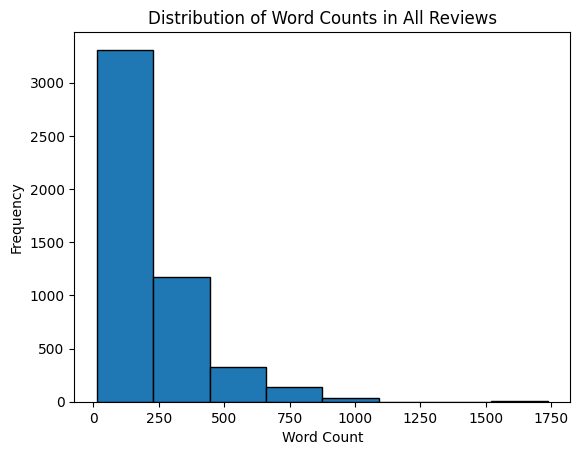

In [11]:
# Plot the total number of words in every review

#Get the word count per review - create new column to store these counts
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

# Create a histogram of word counts
plt.hist(df['word_count'], bins=8, edgecolor='black')

# Set the x-axis label and title
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in All Reviews')

# Display the plot
plt.show()


'''
We can see that most reviews have between 10 and 250 words
''';

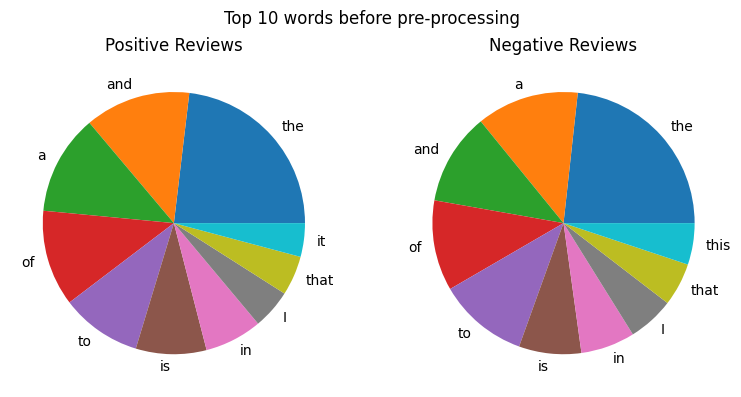

In [12]:
#Another comparison between positive and negative reviews


# Filter positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['review']
# Filter negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['review']

# Tokenize positive reviews
positive_words = [word for review in positive_reviews for word in str(review).split()]
# Tokenize negative reviews
negative_words = [word for review in negative_reviews for word in str(review).split()]

# Count the occurrences of each word in positive reviews
positive_word_counts = pd.Series(positive_words).value_counts().head(10)
# Count the occurrences of each word in negative reviews
negative_word_counts = pd.Series(negative_words).value_counts().head(10)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))

# Plot the top 10 words in positive reviews
ax1.pie(positive_word_counts, labels = positive_word_counts.index)
ax1.set_title('Positive Reviews')

# Plot the top 10 words in negative reviews
ax2.pie(negative_word_counts, labels = negative_word_counts.index)
ax2.set_title('Negative Reviews')

fig.suptitle('Top 10 words before pre-processing')
plt.tight_layout()
plt.show()
'''
From both pie  charts, we can see that most of the frequent words are irrelevant stop words. Thus, data cleaning is required.
''';



---



---



## 4. Text Preprocessing

### Preprocessing Steps:
- Convert all characters to lowercase
- Remove all non-Alphabetic characters
- Remove Punctuation
- Remove Whitespaces
- Remove Stopwords
- Lemmatization


In [13]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [14]:
#Drop non required columns:
df.drop(['word_count'], axis=1, inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
# Convert all reviews text to lowercase
df["review_lower"] = df["review"].apply(lambda text: str.lower(text))
df.head(2)

,review,sentiment,review_lower
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. <br /><br />the...


In [16]:
# Remove Numbers
# Remove URLs
# Remove HTML Tags
# Remove Punctuation
# Remove single characters
# Remove whitespaces

# Get the punctuation elements
PUNCT_TO_REMOVE = string.punctuation

def cleanText(text):
    result = re.sub(r'\d+',' ', text) # Remove Numbers
    result = re.sub('https?://\S+|www\.\S+', ' ', result) # Remove URL links
    result = re.sub(r'<br\s?/><br\s?/>', ' ', result) # Remove HTML tags
    result = result.translate(str.maketrans(' ', ' ', PUNCT_TO_REMOVE)) # Remove Punctuation
    result = re.sub(r'\b\w\b', ' ', result) #Remove single characters
    result = " ".join(result.split()) # Remove Whitespaces
    return result

#Apply the numbers removal to the reviews converted to lower case
df['review_clean'] = df['review_lower'].apply(lambda text: cleanText(text))

#Print one review (the seventh in index) which contains numbers for verification
print('Before Cleaning:\n',df['review_lower'][7])
print('\nAfter Cleaning:\n' ,df['review_clean'][7])

#Drop non-required columns
df.drop(['review_lower'], axis=1, inplace=True)

Before Cleaning:
 this show was an amazing, fresh & innovative idea in the 70's when it first aired. the first 7 or 8 years were brilliant, but things dropped off after that. by 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />it's truly disgraceful how far this show has fallen. the writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. i find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. how can one recognize such brilliance and then see fit to replace it with such mediocrity? i felt i must give 2 stars out of respect for the original cast that made this show such a huge success. as it is now, the show is just awful. i can't believe it's still on the air.

After Cleaning:
 this show was an amazing fres

In [17]:
#Remove stopwords

# Get the stopwords list as a set
stopWords = set(stopwords.words("english"))

def removeStopwords(text):
    return ' '.join([word for word in text.split() if word not in stopWords])

# Apply stop words removal
df['review_woStopwords'] = df['review_clean'].apply(lambda text: removeStopwords(text))

#Print one review for validation
print('Before Stopwords removal:\n',df['review_clean'][7])
print('\nAfter Stopwords removal:\n' ,df['review_woStopwords'][7])


#Drop non-required columns
df.drop(['review_clean'], axis=1, inplace=True)

Before Stopwords removal:
 this show was an amazing fresh innovative idea in the when it first aired the first or years were brilliant but things dropped off after that by the show was not really funny anymore and its continued its decline further to the complete waste of time it is today its truly disgraceful how far this show has fallen the writing is painfully bad the performances are almost as bad if not for the mildly entertaining respite of the guesthosts this show probably wouldnt still be on the air find it so hard to believe that the same creator that handselected the original cast also chose the band of hacks that followed how can one recognize such brilliance and then see fit to replace it with such mediocrity felt must give stars out of respect for the original cast that made this show such huge success as it is now the show is just awful cant believe its still on the air

After Stopwords removal:
 show amazing fresh innovative idea first aired first years brilliant things 

In [18]:
# Performing Lemmatization

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['rev_clean_lemm'] = df['review_woStopwords'].apply(lambda text: lemmatize_words(text))
#df.head()
#Print one review for validation
print('Before Lemmatization:\n',df['review_woStopwords'][7])
print('\nAfter Lemmatization:\n' ,df['rev_clean_lemm'][7])

Before Lemmatization:
 show amazing fresh innovative idea first aired first years brilliant things dropped show really funny anymore continued decline complete waste time today truly disgraceful far show fallen writing painfully bad performances almost bad mildly entertaining respite guesthosts show probably wouldnt still air find hard believe creator handselected original cast also chose band hacks followed one recognize brilliance see fit replace mediocrity felt must give stars respect original cast made show huge success show awful cant believe still air

After Lemmatization:
 show amazing fresh innovative idea first aired first year brilliant thing dropped show really funny anymore continued decline complete waste time today truly disgraceful far show fallen writing painfully bad performance almost bad mildly entertaining respite guesthosts show probably wouldnt still air find hard believe creator handselected original cast also chose band hack followed one recognize brilliance see

In [19]:
# Performing Stemming - Only for learning. Results will be saved in seperate column as I won't be using the stemmed reviews
'''
In the below comparison between stemmed and lemmatized text, we can see that stemming sometimes results in words which are not english - not accurate.
Thus I'll not be using stemming in this project.
''';

from nltk.stem.porter import PorterStemmer

# Drop the two columns
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True)

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["rev_clean_stemm"] = df["review_woStopwords"].apply(lambda text: stem_words(text))


#Print a comparison between Lemmatized vs Stemmed review
print('Stemmed:\n',df['rev_clean_stemm'][7])
print('\nLemmatized:\n' ,df['rev_clean_lemm'][7])

Stemmed:
 show amaz fresh innov idea first air first year brilliant thing drop show realli funni anymor continu declin complet wast time today truli disgrac far show fallen write pain bad perform almost bad mildli entertain respit guesthost show probabl wouldnt still air find hard believ creator handselect origin cast also chose band hack follow one recogn brillianc see fit replac mediocr felt must give star respect origin cast made show huge success show aw cant believ still air

Lemmatized:
 show amazing fresh innovative idea first aired first year brilliant thing dropped show really funny anymore continued decline complete waste time today truly disgraceful far show fallen writing painfully bad performance almost bad mildly entertaining respite guesthosts show probably wouldnt still air find hard believe creator handselected original cast also chose band hack followed one recognize brilliance see fit replace mediocrity felt must give star respect original cast made show huge success

In [20]:

# Print the first rows in the dataset
# Keeping the original reviews text for comparison only - learning purposes
df.rename(columns={'rev_clean_lemm':'review_post'}, inplace = True) #Change the review_woStopWords to review_post
df.rename(columns={'review':'review_pre'}, inplace = True) #Change the review to review_pre
df.head()


,review_pre,sentiment,review_woStopwords,review_post,rev_clean_stemm
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...,one reviewer mentioned watching oz episode you...,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,basically there family little boy jake think t...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...


In [21]:
# Performing some analysis and visualization - For learning purposes not essential to NLP project pipeline
# Let's compare the top 10 words before and after cleaning

#Get the frequent words using "Counter" method
from collections import Counter

#Get the frequent words for the original text
cnt1 = Counter()
for text in df["review_pre"].values:
    for word in text.split():
        cnt1[word] += 1

#Get the frequent words for the preprocessed text
cnt2= Counter()
for text in df["review_post"].values:
    for word in text.split():
        cnt2[word] += 1


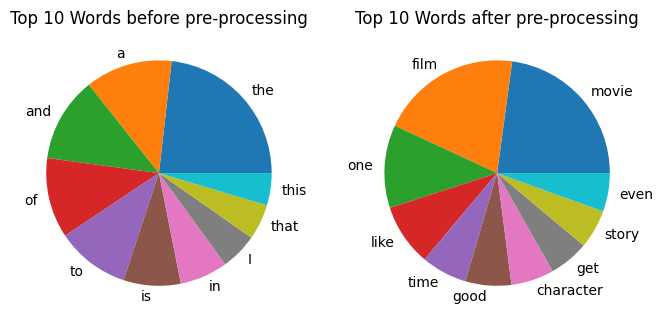

In [22]:
# Let's compare the top 10 words before and after cleaning

figure, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))


cnt1.most_common(10)

top_10_pre = cnt1.most_common(10)
elements_pre, counts_pre = zip(*top_10_pre)
ax1.pie(counts_pre, labels = elements_pre)
ax1.set_title('Top 10 Words before pre-processing')


cnt2.most_common(10)

top_10_post = cnt2.most_common(10)
elements_post, counts_post = zip(*top_10_post)
ax2.pie(counts_post, labels = elements_post)
ax2.set_title('Top 10 Words after pre-processing')

'''
We can clearly see that the words after preprocessing are much more meaningful compared to
the ones before pre-processing - which were mostly stopwords
''';

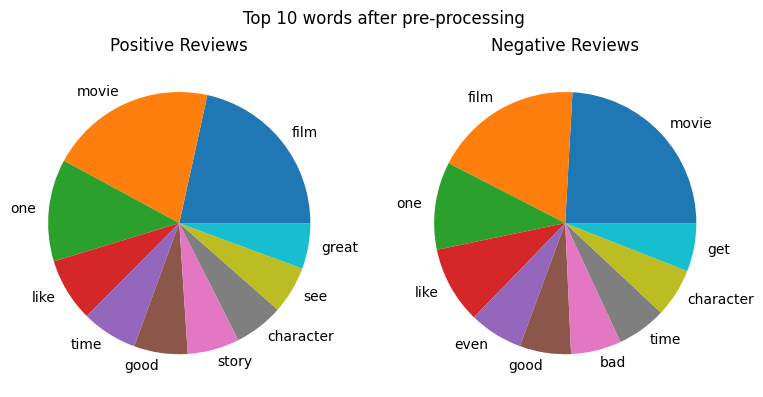

In [23]:
#Let's perform the same comparison between the top words available in the positive reviews agains the negative reviews again and see the difference
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4))


# Filter positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['review_post']
# Filter negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['review_post']

# Tokenize positive reviews
positive_words = [word for review in positive_reviews for word in str(review).split()]
# Tokenize negative reviews
negative_words = [word for review in negative_reviews for word in str(review).split()]

# Count the occurrences of each word in positive reviews
positive_word_counts = pd.Series(positive_words).value_counts().head(10)
# Count the occurrences of each word in negative reviews
negative_word_counts = pd.Series(negative_words).value_counts().head(10)


# Plot the top 10 words in positive reviews
ax1.pie(positive_word_counts, labels = positive_word_counts.index)
ax1.set_title('Positive Reviews')

# Plot the top 10 words in negative reviews
ax2.pie(negative_word_counts, labels = negative_word_counts.index)
ax2.set_title('Negative Reviews')

fig.suptitle('Top 10 words after pre-processing')
plt.tight_layout()
plt.show()
'''
We can see that there are some common words between both positive and negative reviews (e.g. 'moview' and 'film'),
however, there are some other words which seems more frequent in positive than negative reviews.
We can see that some words like "good' are present in both Positive and negative reviews. This might be confusing at first glance, but
most probably, once 2-grams is used this will make more sense. For example:
1- for positive reviews it might be "very good"
2- for negative reviews it might be "not good"
''';

In [24]:
df.head()

,review_pre,sentiment,review_woStopwords,review_post,rev_clean_stemm
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...,one reviewer mentioned watching oz episode you...,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,basically there family little boy jake think t...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...


In [25]:
# Drop all non-required columns and change the sentiments to 1 and 0

# First, let's create a new column where we will mapp every sentiment to 0 or 1
df['sent_num'] = df.sentiment.map({
    'positive': 1,
    'negative': 0

})

# Now drop all non-required columns
df.drop(columns=['review_pre','sentiment','review_woStopwords','rev_clean_stemm'], inplace=True)
#df.head()

In [26]:
# change the column names to 'review' and 'sentiment'
df.rename(columns={'review_post':'review','sent_num':'sentiment'}, inplace=True)
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


In [27]:
# Performing TF-IDF - for learning only

# Will perform TF-IDF using the below library
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer() # Create an instance of the TfidfVectorizer
transformed_output = v.fit(df['review']) # Fit\train the model based on the reviews in our dataset
all_feature_names = v.get_feature_names_out() # Extract the features and store them in a new variable so we can take a look at them


In [28]:
# print 10 features from the middle of the list
all_feature_names[2000:2010]

array(['arron', 'arrondissement', 'arrow', 'arse', 'arseclenchingly',
       'arsehole', 'arsenal', 'arsene', 'arsenic', 'arsonist'],
      dtype=object)

In [29]:
# Removing the 10 "least" and "most" common words from the data as they do not have much significance.
#least_common = cnt2.most_common()[:-11:-1] #List the least common words
#least_common_words = [word for word, count in least_common]

# Identify the n most common and least common words
n = 10  # or however many you want to remove
most_common_words = [word for word, count in cnt2.most_common(n)]
least_common_words = [word for word, count in cnt2.most_common()[:-n-1:-1]]

# Combine most and least common words into one set for removal
words_to_remove = set(most_common_words + least_common_words)

# Function to remove unwanted words from a review
def remove_unwanted_words(review, unwanted_words):
    return ' '.join(word for word in review.split() if word not in unwanted_words)

# Apply the function to each review in the DataFrame
df['review'] = df['review'].apply(lambda review: remove_unwanted_words(review, words_to_remove))



---



---



## 5. Text Representaion
### We will implement the below methods. Only Bag of Words output will be used to train the classifier later.
1. POS tagging
2. Word Embedding (word2vec)
3. N Grams
4. Bag of Words (countVectorizer)

In [30]:
#import required libraries and methods

from nltk.util import ngrams # To create N-Grams text representation
from nltk.tokenize import word_tokenize # For tokenization
from gensim.models import Word2Vec # To represent words as vectors (word embedding)
nltk.download('averaged_perceptron_tagger') #For POS tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [31]:
# Tokenize the reviews text using 'word_tokenizer' method (more accurate than split())
df['tokenized_review'] = df.review.apply(lambda text: word_tokenize(text))

In [32]:
df.tokenized_review.head()

0    [reviewer, mentioned, watching, oz, episode, y...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, hot, summer, ...
3    [basically, there, family, little, boy, jake, ...
4    [petter, matteis, love, money, visually, stunn...
Name: tokenized_review, dtype: object

In [33]:
df.head()

,review,sentiment,tokenized_review
0,reviewer mentioned watching oz episode youll h...,1,"[reviewer, mentioned, watching, oz, episode, y..."
1,wonderful little production filming technique ...,1,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend hot summer weekend...,1,"[thought, wonderful, way, spend, hot, summer, ..."
3,basically there family little boy jake think t...,0,"[basically, there, family, little, boy, jake, ..."
4,petter matteis love money visually stunning wa...,1,"[petter, matteis, love, money, visually, stunn..."


###5.1 POS Tagging

In [34]:
# Perform POS tagging
df['pos_reviews'] = df['tokenized_review'].apply(nltk.pos_tag)
df.head()

,review,sentiment,tokenized_review,pos_reviews
0,reviewer mentioned watching oz episode youll h...,1,"[reviewer, mentioned, watching, oz, episode, y...","[(reviewer, NN), (mentioned, VBD), (watching, ..."
1,wonderful little production filming technique ...,1,"[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N..."
2,thought wonderful way spend hot summer weekend...,1,"[thought, wonderful, way, spend, hot, summer, ...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,basically there family little boy jake think t...,0,"[basically, there, family, little, boy, jake, ...","[(basically, RB), (there, EX), (family, NN), (..."
4,petter matteis love money visually stunning wa...,1,"[petter, matteis, love, money, visually, stunn...","[(petter, NN), (matteis, NN), (love, VB), (mon..."


In [35]:
'''
 Let's convert the POS tags to a vector by using one-hot encoding. This process will generate a binary vector for each unique POS tag.
 We can then use this numerical representation to combine it with BiGram and word2vec vectors to concentrate them all together to enhance
 the classifier performance. But we will not perform this in this project as the required RAM and processing exceeds the available resources.
''';

from sklearn.preprocessing import OneHotEncoder

# Convert list of tuples to list of POS tags
df['pos_tags_only'] = df['pos_reviews'].apply(lambda x: [tag for word, tag in x])

# Convert list of POS tags to string
df['pos_tags_str'] = df['pos_tags_only'].apply(' '.join)

# Initialize OneHotEncoder
one_hot_enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the 'pos_tags_str' column
pos_features = one_hot_enc.fit_transform(df['pos_tags_str'].values.reshape(-1, 1))

print(pos_features[0])

[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


###5.2 N-Gram

In [36]:
# Use N-Grams (Bi-Gram)
df['bigrams'] = df['tokenized_review'].apply(lambda x: list(ngrams(x, 2)))
df.bigrams.head()

0    [(reviewer, mentioned), (mentioned, watching),...
1    [(wonderful, little), (little, production), (p...
2    [(thought, wonderful), (wonderful, way), (way,...
3    [(basically, there), (there, family), (family,...
4    [(petter, matteis), (matteis, love), (love, mo...
Name: bigrams, dtype: object

In [37]:
# If we wanted to use these bi-grams in our classifier
# We would convert the list of bigrams to list of strings
df['bigrams_str'] = df['bigrams'].apply(lambda x: ['_'.join(i) for i in x])

# Convert list of strings to a single string
df['bigrams_sentence'] = df['bigrams_str'].apply(' '.join)

In [38]:
# Then we would use countVectorizer to vectorize the bigrams

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer and transform your data
bigram_features = vectorizer.fit_transform(df['bigrams_sentence'])

###5.3 word2vec (Word Embedding)

In [39]:
# Creating and training the Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_review'].tolist(), vector_size=100, window=5, min_count=1, workers=4)
#vector_size is the number of dimensions in which we wish to represent our word. This is the size of the word vectors.
#Other parameters include window, which is the size of the context window,
#and min_count, which is the minimum frequency count of words in order to include it in the Word2Vec model vocabulary
word2vec_model.train(df['tokenized_review'].tolist(), total_examples=len(df['tokenized_review'].tolist()), epochs=10)


(5446565, 5506470)

In [40]:
# Performing a quick test to test our word2Vec conversion
# Let's see what are the closest words to the word 'perfect'
similar = word2vec_model.wv.most_similar('perfect')
print('Words similar to "perfect" are:\n',similar)

'''
We can clearly see - as expected- that the word 'wonderful'
is considered the closest to 'perfect', so our word2vec
representation is working as intended
''';

Words similar to "perfect" are:
 [('wonderful', 0.7757607102394104), ('outstanding', 0.7749181985855103), ('terrific', 0.7716992497444153), ('amazing', 0.7711220979690552), ('kilmers', 0.76817786693573), ('brilliant', 0.7449885606765747), ('excellent', 0.7408263087272644), ('fantastic', 0.7360664010047913), ('worthy', 0.7272540330886841), ('bearable', 0.7231185436248779)]


In [41]:
# Create Word2Vec feature vectors for each review (instead of each word in a review)
# this word2vec per review is just an average of all the word vectors inside this review
# Note: we will not be using these vectors in our Classifier because of resources limitations

def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

w2v_feature_array = averaged_word_vectorizer(corpus=df['tokenized_review'].tolist(), model=word2vec_model, num_features=100)


###5.4 Bag of Words

In [42]:
# BoWs is created using Count Vectorized. This is considered one of the basic representations menthods

from sklearn.feature_extraction.text import CountVectorizer #BoW
from nltk.tokenize import RegexpTokenizer #Tokenization
token = RegexpTokenizer(r'[a-zA-Z]+') #We are only interested in alphabit words
cv = CountVectorizer(ngram_range = (1,1),tokenizer = token.tokenize) # tokenize uni-gram basis
text_counts = cv.fit_transform(df['review']) # Convert to Documnet-Term Matrix (BoW implementation)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




---



---



## 6. Text Classification
 We will use the below mentioned models for classification and will compare their results later in the "Evaluation" section.

 * **Why CNB:** Complement Naive Bayes is a variation of the standard Multinomial Naive Bayes (MNB) classifier which is suitable for sentiment analysis applications. It is easy to implement and fast to train and it provides a probabilistic framework.

 * **Why RNN**: This is a Deep Learning method. These models are designed to handle sequences and can capture the order and context within the text.

 * **Why LSTM**: LSTM networks are a type of recurrent neural network (RNN) capable of learning long-term dependencies in sequence data, which is common in text. They are particularly powerful for sentiment analysis because they can understand the context over longer stretches of text.


In [43]:
# Importing required libraries for this section

from sklearn import metrics
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split # For splitting the data into train and test data

# Importing the required libraries and methods for RNN and LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM

###6.1 Complement Naive Bayes Classifier (CNB)


ComplementNB model accuracy is 83.80%
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       789
           1       0.86      0.79      0.82       711

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



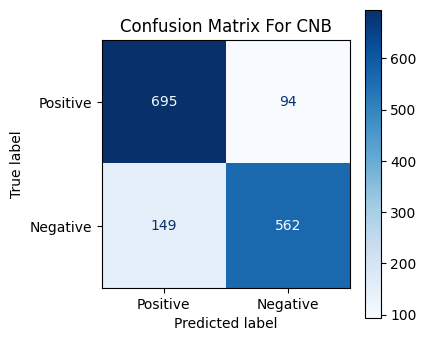

In [44]:
# Let's split the dataset into training and testing sets.
labels = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(text_counts, labels, test_size=0.3, random_state=42)

# Implementing CNB classifier

CNB = ComplementNB() #Create an instance of the model
CNB.fit(X_train, y_train) #Train the model using the training set

predictedCNB = CNB.predict(X_test) #Use the same model to predict using the texting set
accuracy_score = metrics.accuracy_score(predictedCNB, y_test) #compare between the predicted and actual sentiments

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predictedCNB))


# Compute confusion matrix CNB
cmCNB = confusion_matrix(y_test, predictedCNB)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Confusion Matrix For CNB')
disp = ConfusionMatrixDisplay(confusion_matrix=cmCNB, display_labels=['Positive', 'Negative'])
disp.plot(values_format='.0f', cmap='Blues', ax=ax)
plt.show()

**Comments on the CNB model scores:**
the model shows a relatively balanced performance between the two classes, with a slight trade-off favoring precision over recall for positive reviews. The high overall accuracy and F1-scores indicate that the ComplementNB model is a competent classifier for this specific dataset.

###6.2 Recurrent Neural Network (RNN)

In [45]:
# Creating another test and train datasets from the tokenized text
labels = df['sentiment']
texts = df['review']
X_train2, X_test2, y_train2, y_test2 = train_test_split(texts, labels, test_size=0.3, random_state=42)


# Create a tokenizer and fit it on the texts
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(X_train2)

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(X_test2)


# Convert the texts to sequences of integers
X_train_seq2 = tokenizer1.texts_to_sequences(X_train2)
X_test_seq2 = tokenizer2.texts_to_sequences(X_test2)

# Pad the sequences so they're all the same length
# Then we can use this sequence as in input in our RNN or LSTM model
#max_sequence_length = max(len(x) for x in X_train_seq2)  # Or some other predefined maximum
X_train_padded2 = pad_sequences(X_train_seq2, maxlen=100)
X_test_padded2 =  pad_sequences(X_test_seq2, maxlen=100)

print(f"\nNumber of samples in X_train: {len(X_train2)}")
print(f"Number of samples in y_train: {len(y_train2)}")
print(f"Number of samples in X_test: {len(X_test2)}")
print(f"Number of samples in y_test: {len(y_test2)}")


Number of samples in X_train: 3499
Number of samples in y_train: 3499
Number of samples in X_test: 1500
Number of samples in y_test: 1500


In [46]:
# Define the size of the vocabulary
vocab_size = len(tokenizer1.word_index) + 1  # Adding 1 because of reserved 0 index

# Define your model
model_RNN = Sequential()
model_RNN.add(Embedding(input_dim=vocab_size, output_dim=100))
model_RNN.add(SimpleRNN(units=32))
model_RNN.add(Dense(units=1, activation='sigmoid'))

# Compile your model
model_RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
model_RNN.fit(X_train_padded2, y_train2, epochs=3, validation_split=0.2)

Epoch 1/3
88/88 [==============================] - 45s 414ms/step - loss: 0.6823 - accuracy: 0.5620 - val_loss: 0.6504 - val_accuracy: 0.6386
Epoch 2/3
88/88 [==============================] - 20s 231ms/step - loss: 0.2349 - accuracy: 0.9804 - val_loss: 0.5674 - val_accuracy: 0.7171
Epoch 3/3
88/88 [==============================] - 18s 205ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.5709 - val_accuracy: 0.7271


47/47 [==============================] - 1s 9ms/step
Accuracy: 0.5133333333333333
              precision    recall  f1-score   support

    Positive       0.54      0.50      0.52       789
    Negative       0.49      0.53      0.51       711

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.52      0.51      0.51      1500



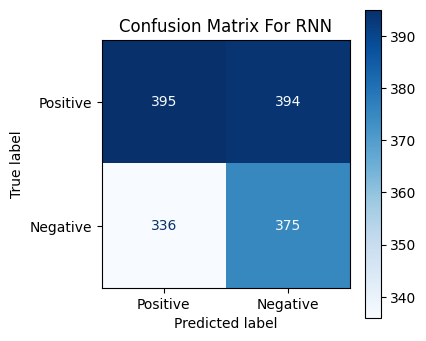

In [47]:
from sklearn.metrics import accuracy_score #Re-import the method again as we don't want to just overwrite the one we used previously

# Make predictions on the test data
y_pred_probRNN = model_RNN.predict(X_test_padded2)
y_predRNN = (y_pred_probRNN > 0.5).astype("int32")

# Evaluate accuracy
accuracy = accuracy_score(y_test2, y_predRNN)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test2, y_predRNN, target_names=['Positive', 'Negative'])
print(report)


# Compute confusion matrix RNN
cm = confusion_matrix(y_test2, y_predRNN)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Confusion Matrix For RNN')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot(values_format='.0f', cmap='Blues', ax=ax)
plt.show()

**Comments on the RNN model:**
The Recurrent Neural Network (RNN) model has demonstrated a performance that is only slightly better than random guessing with an overall accuracy of 50.8% on the dataset, which consists of 1500 instances labeled as Positive or Negative. In general, these metrics suggest that the RNN model is not performing well in distinguishing between Positive and Negative classes. We will discuss why in the coming section.

###6.3 Long-Short Term Memory (LSTM)

In [48]:
# Define your model
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=vocab_size, output_dim=100))
model_LSTM.add(LSTM(units=32))
model_LSTM.add(Dense(units=1, activation='sigmoid'))

# Compile your model
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train your model
model_LSTM.fit(X_train_padded2, y_train2, epochs=5, validation_split=0.2)

Epoch 1/5
88/88 [==============================] - 16s 146ms/step - loss: 0.6055 - accuracy: 0.6885 - val_loss: 0.4501 - val_accuracy: 0.8071
Epoch 2/5
88/88 [==============================] - 10s 114ms/step - loss: 0.2110 - accuracy: 0.9275 - val_loss: 0.4139 - val_accuracy: 0.8271
Epoch 3/5
88/88 [==============================] - 6s 69ms/step - loss: 0.0538 - accuracy: 0.9893 - val_loss: 0.5105 - val_accuracy: 0.8114
Epoch 4/5
88/88 [==============================] - 5s 61ms/step - loss: 0.0185 - accuracy: 0.9964 - val_loss: 0.6697 - val_accuracy: 0.8086
Epoch 5/5
88/88 [==============================] - 6s 73ms/step - loss: 0.0155 - accuracy: 0.9979 - val_loss: 0.7489 - val_accuracy: 0.8000


47/47 [==============================] - 1s 6ms/step
Accuracy: 0.5133333333333333
              precision    recall  f1-score   support

    Positive       0.54      0.50      0.52       789
    Negative       0.49      0.53      0.51       711

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.52      0.51      0.51      1500



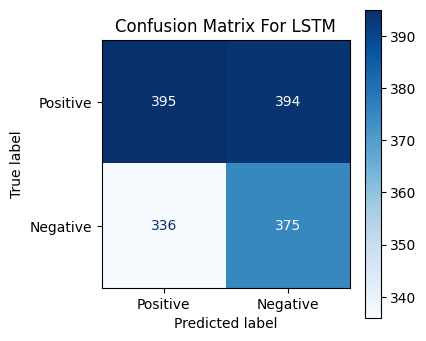

In [49]:
from sklearn.metrics import accuracy_score #Re-import the method again as we don't want to just overwrite the one we used previously

# Make predictions on the test data
y_pred_probLSTM = model_LSTM.predict(X_test_padded2)
y_predLSTM = (y_pred_probRNN > 0.5).astype("int32")

# Evaluate accuracy
accuracy = accuracy_score(y_test2, y_predLSTM)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test2, y_predLSTM, target_names=['Positive', 'Negative'])
print(report)


# Compute confusion matrix LSTM
cmLSTM = confusion_matrix(y_test2, y_predLSTM)

# Plot the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title('Confusion Matrix For LSTM')
disp = ConfusionMatrixDisplay(confusion_matrix=cmLSTM, display_labels=['Positive', 'Negative'])
disp.plot(values_format='.0f', cmap='Blues', ax=ax)
plt.show()

**Comments on the LSTM model:**
exhibits an accuracy of 50.8% on the evaluated dataset. This performance level is marginally above what random chance would yield (50% accuracy for a binary classification task), indicating that the model is struggling to effectively differentiate between the Positive and Negative classes. The model's performance is suboptimal and does not exhibit a significant advantage in distinguishing between the Positive and Negative classes. This might suggest that the model either requires more data. We will discuss this more in the coming section.



---



---



##7. Evaluation, Inference, Recommendation and Reflection

###7.1 Evaluation

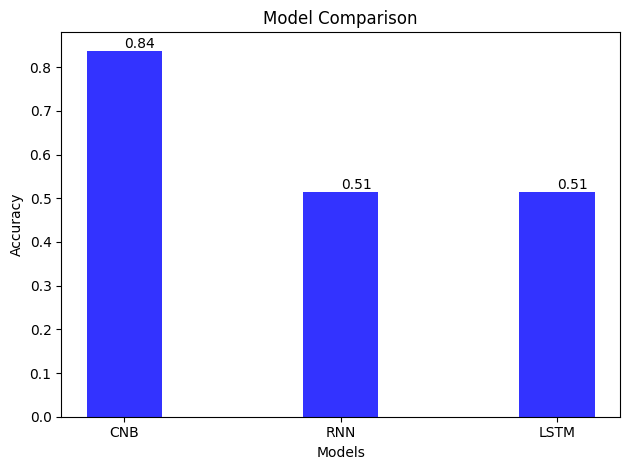

In [50]:
# Lets visualize the accuracy

accuracy_CNB = accuracy_score(y_test, predictedCNB)
accuracy_RNN = accuracy_score(y_test2, y_predRNN)
accuracy_LSTM = accuracy_score(y_test2, y_predLSTM)

# Define the model names and their corresponding accuracies
models = ['CNB', 'RNN', 'LSTM']
accuracies = [accuracy_CNB, accuracy_RNN, accuracy_LSTM]

# Create a bar chart
fig, ax = plt.subplots()
bar_width = 0.35  # Width of the bars
opacity = 0.8  # Opacity of the bars

# Create bars
bars = plt.bar(models, accuracies, bar_width, alpha=opacity, color='b')

# Add title and labels
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(models)

# Add the actual value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')  # va='bottom' to align the text vertically

# Show the plot
plt.tight_layout()
plt.show()

**Comparison between the three Models metrics**
* **Accuracy:** The CNB model has a significantly higher accuracy (0.84) compared to both the RNN and LSTM models. This suggests that the CNB model is overall more effective in correctly classifying both positive and negative samples.

* **Precision:** The CNB model also has higher precision than the RNN and LSTM models. This indicates that when the CNB model predicts a sample as positive or negative, it is more likely to be correct.

* **F1-Score:** The F1-score for the CNB model is higher than that of the RNN and LSTM models, which suggests a better balance between precision and recall in the CNB model.

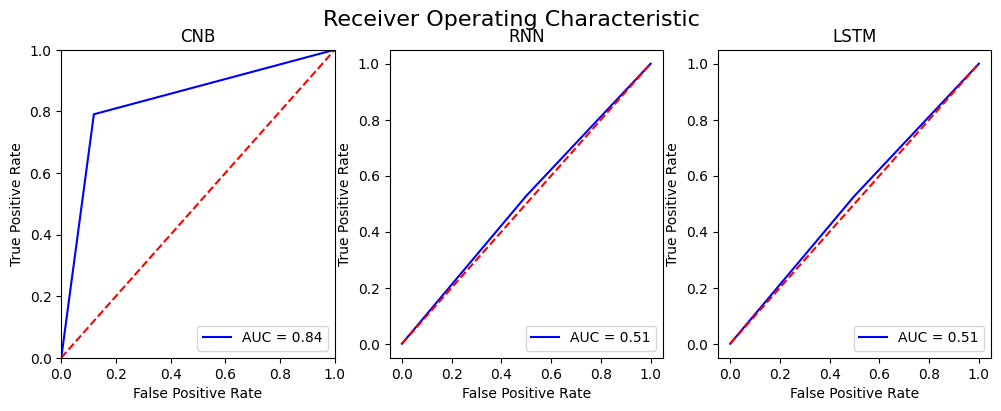

In [51]:
# AUC-ROC Curve

aucFig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))


fprCNB, tprCNB, thresholdCNB = metrics.roc_curve(y_test, predictedCNB)
fprRNN, tprRNN, thresholdRNN = metrics.roc_curve(y_test2, y_predRNN)
fprLSTM, tprLSTM, thresholdLSTM = metrics.roc_curve(y_test2, y_predLSTM)

roc_aucCNB = metrics.auc(fprCNB, tprCNB)
roc_aucRNN = metrics.auc(fprRNN, tprRNN)
roc_aucLSTM = metrics.auc(fprLSTM, tprLSTM)

ax1.set_title('CNB')
ax1.plot(fprCNB, tprCNB, 'b', label = 'AUC = %0.2f' % roc_aucCNB)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')


ax2.set_title('RNN')
ax2.plot(fprRNN, tprRNN, 'b', label = 'AUC = %0.2f' % roc_aucRNN)
ax2.legend(loc = 'lower right')
ax2.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax2.set_ylabel('True Positive Rate')
ax2.set_xlabel('False Positive Rate')


ax3.set_title('LSTM')
ax3.plot(fprLSTM, tprLSTM, 'b', label = 'AUC = %0.2f' % roc_aucLSTM)
ax3.legend(loc = 'lower right')
ax3.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax3.set_ylabel('True Positive Rate')
ax3.set_xlabel('False Positive Rate')

aucFig.suptitle('Receiver Operating Characteristic', fontsize=16)
aucFig.show()

###7.2 Inference

We can clearly see that the accuracy of a model like Complement Naive Bayes (CNB) is higher than that of more complex models like RNNs or LSTMs. This can be due to several reasons. Here are some potential explanations:

1. **Data Characteristics:** Naive Bayes models, including CNB, can perform exceptionally well on certain types of data, especially when the assumption of feature independence holds true to some extent. If the dataset is small, the simplicity of Naive Bayes can be an advantage because it requires fewer data to estimate the necessary probabilities.

2. **Overfitting in Complex Models:** RNNs and LSTMs have a larger number of parameters and are prone to overfitting, especially on smaller datasets.

3. **Feature Representation:** If the features used for the CNB model capture the data well, it might outperform RNNs and LSTMs that are using less informative representations.

4. **Model Complexity:** Sometimes, simpler models can generalize better than complex ones. This is related to the bias-variance tradeoff. A complex model (high variance) like an LSTM might model the noise in the training data, leading to poor generalization, whereas a simpler model (high bias) like CNB might not fit the training data as closely but generalizes better.

5. **Training Process:** RNNs and LSTMs are sensitive to the initialization and optimization process. If they are not trained with an appropriate learning rate, for an adequate number of epochs, or with a suitable optimization algorithm, they might not converge to a good solution.

###7.3 Recommendation

**Below are some of the recommentations related to this project:**
1. We might use more data for training out of the 50K reviews in the original dataset. However, we would need to have more resources.

2. Another point is combining multiple representation methods together instead of only using the BoW representation. However, this would also require higher resources.
3. Learning Rate and Optimizers: Choose an appropriate learning rate and optimizer (e.g., Adam, RMSprop) for training neural networks. Consider using learning rate schedules or learning rate finders.
4. Early Stopping: Implement early stopping during training to halt the training process once the model performance stops improving on a validation set.

###7.4 Reflection

* **Complexity vs. Performance:**
The results serve as a reminder that more complex models do not always lead to better performance. Simpler models like CNB can be more robust and easier to train, and they often require less data to perform well.
This outcome reinforces the importance of starting with simpler models as baselines before moving on to more complex architectures.

* **Training and Computational Resources:**
Training RNNs and LSTMs requires more computational power and time. If the training was not adequately conducted due to resource constraints, this could have led to suboptimal performance.
It's also possible that the RNN and LSTM models needed more epochs to converge or could have benefited from advanced optimization strategies.

* The results suggest that future work might include revisiting the feature engineering and data preprocessing steps for the neural models.
Experimentation with different architectures (e.g., GRU, Transformer-based models) and training strategies might yield improvements.

## References:
1. https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data.
2. https://www.upgrad.com/blog/bayes-theorem-in-machine-learning/
3. https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e
4. https://github.com/DrManishSharma/NLP/blob/master/SentiAnalysis.ipynb

In [52]:
1+1

2